In [229]:
import pandas as pd

In [293]:
import pandas as pd
data=pd.read_csv("filtered_data-14.csv")

In [294]:
data.head(10)

,ID,Number,Description,Keywords,Classes
0,699,71988,A man in a wheelchair and another sitting on a...,"['man', 'wheelchair', 'another', 'sitting', 'b...","['person', 'object', 'person', 'activity', 'ob..."
1,701,193622,A man sits with a traditionally decorated cow,"['man', 'sits', 'traditionally decorated cow']","['person', 'activity', 'animal']"
2,827,52087,A man getting a drink from a water fountain th...,"['man', 'getting', 'drink', 'water fountain', ...","['person', 'activity', 'object', 'object', 'lo..."
3,891,119964,A person holding a skateboard overlooks a dead...,"['person', 'holding', 'skateboard', 'dead fiel...","['person', 'activity', 'vehicle', 'location']"
4,1221,382406,A woman is walking a dog in the city.,"['woman', 'walking', 'dog', 'city']","['person', 'activity', 'animal', 'location']"
5,1373,573223,A little girl in a public bathroom for kids.,"['little girl', 'public bathroom for kids']","['person', 'location']"
6,1774,267802,A group of people riding mopeds in a busy street.,"['people', 'riding', 'mopeds', 'busy street']","['person', 'activity', 'vehicle', 'location']"
7,1828,208408,A person walking in the rain on the sidewalk.,"['person', 'walking', 'rain', 'sidewalk']","['person', 'activity', 'location', 'location']"
8,2099,571970,A man with a bike at a marina,"['man', 'bike', 'marina']","['person', 'vehicle', 'location']"
9,2152,133680,A man is sitting on a bench next to a bike.,"['man', 'sitting', 'bench', 'bike']","['person', 'activity', 'object', 'vehicle']"


In [295]:
filtered_df = data[data['Classes'].apply(lambda x: x.count('person') == 2)]
result_df = data.merge(filtered_df, how='outer', indicator=True).query('_merge=="left_only"').drop('_merge', axis=1)
result_df.head()

,ID,Number,Description,Keywords,Classes
1,701,193622,A man sits with a traditionally decorated cow,"['man', 'sits', 'traditionally decorated cow']","['person', 'activity', 'animal']"
2,827,52087,A man getting a drink from a water fountain th...,"['man', 'getting', 'drink', 'water fountain', ...","['person', 'activity', 'object', 'object', 'lo..."
3,891,119964,A person holding a skateboard overlooks a dead...,"['person', 'holding', 'skateboard', 'dead fiel...","['person', 'activity', 'vehicle', 'location']"
4,1221,382406,A woman is walking a dog in the city.,"['woman', 'walking', 'dog', 'city']","['person', 'activity', 'animal', 'location']"
5,1373,573223,A little girl in a public bathroom for kids.,"['little girl', 'public bathroom for kids']","['person', 'location']"


In [302]:
Keywords=list(result_df['Keywords'])

In [297]:
classes=list(result_df['Classes'])

In [303]:
i=0
for a in Keywords:
    input_list = eval(a)
    Keywords[i] = list(input_list)
    i+=1

In [2]:
Keywords

In [310]:
# Flatten the list of lists
flattened_list = [item for sublist in classes for item in sublist]

# Count the occurrences of each unique string
unique_counts = {item: flattened_list.count(item) for item in set(flattened_list)}

print(unique_counts)

{'person': 49292, 'activity': 56169, 'object': 51151, 'vehicle': 13986, 'animal': 5196, 'bodypart': 1881, 'location': 28380}


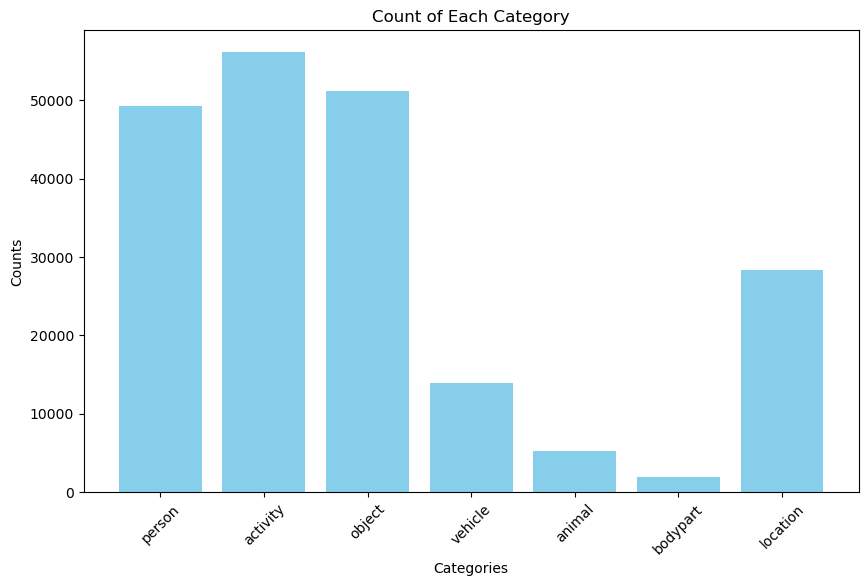

In [311]:
import matplotlib.pyplot as plt

data = unique_counts

# Extracting labels and counts from the dictionary
labels = list(data.keys())
counts = list(data.values())

plt.figure(figsize=(10, 6))

# Creating the count plot
plt.bar(labels, counts, color='skyblue')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Count of Each Category')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


In [3]:
# Initialize lists to store the extracted data
import random
Generated_descriptions = []
Generated_classes = []
Generated_keywords = []

# Read the text data from the file
with open("client_NER.txt", "r") as file:
    lines = file.readlines()

# Initialize variables to temporarily store location and vehicle information
current_class = []
current_keywords = []

# Iterate over each line and extract the information
for line in lines:
    line = line.strip()
    if line:  # Skip empty lines
        parts = line.split(": ")
        if len(parts) == 2:
            key, value = parts
            values=value.split(", ")
            for value in values:
                if key == "location":
                    current_class.append(key)
                    current_keywords.append(value)
                elif key == "vehicle":
                    current_class.append(key)
                    current_keywords.append(value)
                elif key == "activity" and random.randint(0,1)==0:
                    current_class.append(key)
                    current_keywords.append(value)
                elif key == "person" and random.randint(0,1)==0:
                    current_class.append(key)
                    current_keywords.append(value)
                elif key == "animal":
                    current_class.append(key)
                    current_keywords.append(value)
                elif key == "object"  and random.randint(0,1)==0:
                    current_class.append(key)
                    current_keywords.append(value)
                elif key == "bodypart":
                    current_class.append(key)
                    current_keywords.append(value)
                else:
                    continue
        else:
            Generated_descriptions.append(line)
            if current_class:
                Generated_classes.append(current_class)
                current_class = []
            if current_keywords:
                Generated_keywords.append(current_keywords)
                current_keywords = []

# Append the last class and keywords
if current_class:
    Generated_classes.append(current_class)
if current_keywords:
    Generated_keywords.append(current_keywords)

for a in range(len(Generated_keywords)):
    class_data=Generated_classes[a]
    index_data=Generated_keywords[a]
    Generated_keywords[a] = [entry for idx, entry in enumerate(index_data) if 'none' not in entry]
    removed_indexes = [idx for idx, entry in enumerate(index_data) if 'none' in entry]
    count=0
    for a in removed_indexes:
        del class_data[a-count]
        count+=1
        print(class_data)

In [307]:
print("Number of descriptions:", len(Generated_descriptions))
print("Number of classes:", len(Generated_classes))
print("Number of keywords:", len(Generated_keywords))

Number of descriptions: 6797
Number of classes: 6797
Number of keywords: 6797


In [309]:
i=5000
print(Generated_descriptions[i])
print(Generated_classes[i])
print(Generated_keywords[i])

Plush elephant carrying hat in shopping mall.
['location', 'animal', 'activity', 'object']
['shopping mall', 'elephant', 'carrying', 'plush']


In [324]:
final_description=Generated_descriptions+description_list
final_classes=Generated_classes+classes
final_keywords=Generated_keywords+Keywords

In [321]:
description_list=list()
for a in result_df['Description']:
    description_list.append(a)

In [327]:
import pandas as pd
data=pd.DataFrame({"Description":final_description,"Keywords":final_keywords,"Classes":final_classes})
data.to_csv("Final_File.csv")

In [328]:
# Flatten the list of lists
flattened_list = [item for sublist in final_classes for item in sublist]

# Count the occurrences of each unique string
unique_counts = {item: flattened_list.count(item) for item in set(flattened_list)}

print(unique_counts)

{'person': 49973, 'activity': 59254, 'object': 53980, 'vehicle': 16618, 'bodypart': 2879, 'animal': 7892, 'location': 34902}


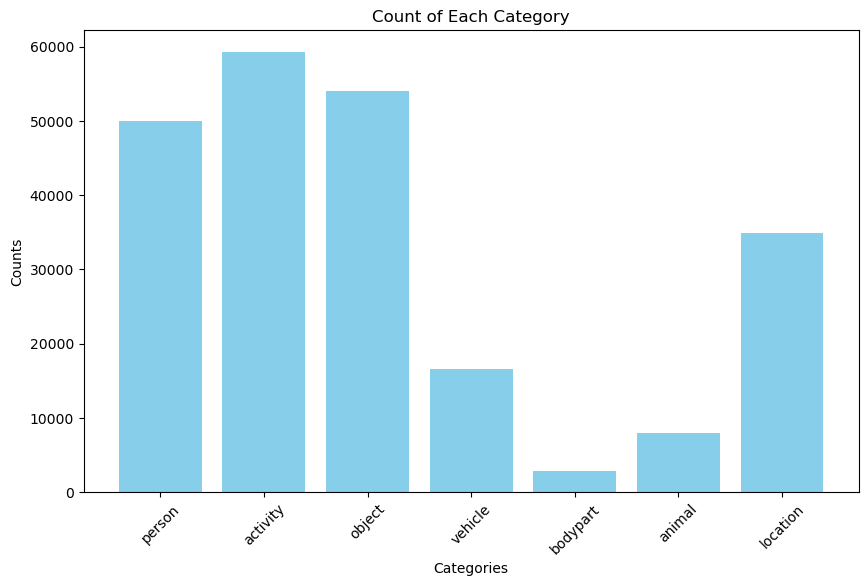

In [329]:
import matplotlib.pyplot as plt

data = unique_counts

# Extracting labels and counts from the dictionary
labels = list(data.keys())
counts = list(data.values())

plt.figure(figsize=(10, 6))

# Creating the count plot
plt.bar(labels, counts, color='skyblue')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Count of Each Category')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


In [331]:
from itertools import combinations

data = {'person': 49973, 'activity': 59254, 'object': 53980, 'vehicle': 16618, 'bodypart': 2879, 'animal': 7892, 'location': 34902}

# Calculate the percentage relationship between every pair of categories
relationships = {}
for category1, category2 in combinations(data.keys(), 2):
    relationship_key = f"{category1}_to_{category2}"
    relationship_value = (data[category2] / data[category1]) * 100
    relationships[relationship_key] = relationship_value

# Show the percentage relationships
for relationship, percentage in relationships.items():
    print(f"{relationship}: {percentage:.2f}%")


person_to_activity: 118.57%
person_to_object: 108.02%
person_to_vehicle: 33.25%
person_to_bodypart: 5.76%
person_to_animal: 15.79%
person_to_location: 69.84%
activity_to_object: 91.10%
activity_to_vehicle: 28.05%
activity_to_bodypart: 4.86%
activity_to_animal: 13.32%
activity_to_location: 58.90%
object_to_vehicle: 30.79%
object_to_bodypart: 5.33%
object_to_animal: 14.62%
object_to_location: 64.66%
vehicle_to_bodypart: 17.32%
vehicle_to_animal: 47.49%
vehicle_to_location: 210.03%
bodypart_to_animal: 274.12%
bodypart_to_location: 1212.30%
animal_to_location: 442.25%
